<h2 style="text-align: center">TITANIC SURVIVABILITY PREDICTIVE ANALYTICS PROJECT<i><br>USING CLASSIFICATION MACHINE LEARNING MODELS</i></h2>
<hr>
<h4 style="text-align: center">ANALYST : JUNNALYN M. MERILLO</h4>

<h2> BASIC OF MACHINE LEARNING </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [2]:
Titanic = pd.read_csv('Datasets//Titanic.csv') 
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Drop irrelevant columns
Titanic = Titanic[["Survived", "Pclass", "Sex", "Age","Embarked"]]

# Drop missing values
Titanic = Titanic.dropna()

# Encode categorical variable
Titanic["Sex"] = Titanic["Sex"].map({"male": 0, "female": 1})
Titanic["Embarked"] = Titanic["Embarked"].map({"C":0, "Q":1, "S":2})

In [4]:
Titanic

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,2
1,1,1,1,38.0,0
2,1,3,1,26.0,2
3,1,1,1,35.0,2
4,0,3,0,35.0,2
...,...,...,...,...,...
885,0,3,1,39.0,1
886,0,2,0,27.0,2
887,1,1,1,19.0,2
889,1,1,0,26.0,0


In [5]:
X = Titanic[["Pclass", "Sex", "Age", "Embarked"]]
y = Titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h2> Accuracy Test </h2>

In [6]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7482517482517482


<h4>Accuracy Result</h4>
<hr>
<h5> When the result of the accuracy is above 0.6 it means the model is picking up patterns it is now <strong> LEARNING </strong></h5>

<h2>Feature Selection </h2>

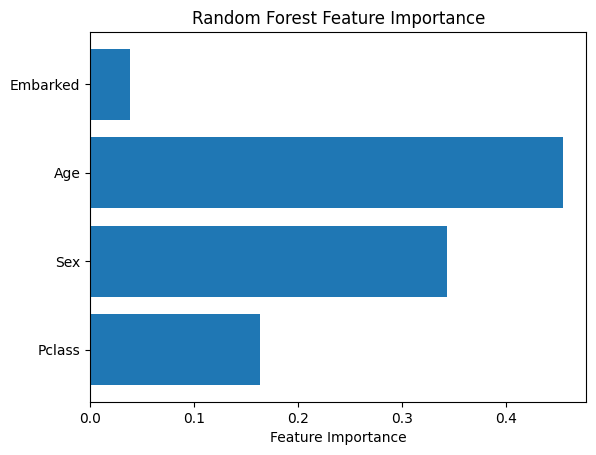

In [7]:
importances = model.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

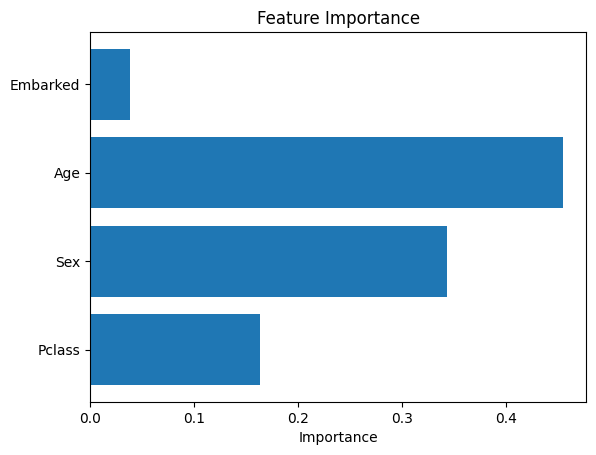

In [8]:
importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

<h2>CONFUSION MATRIX</h2>

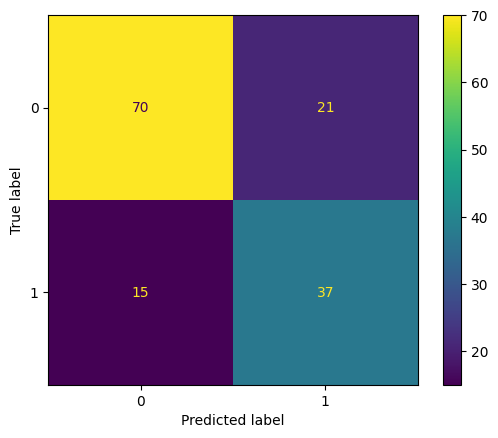

In [9]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<h2> PRACTICAL APPLICATION </h2>
<hr>
<ul>
   <li>Pclass	Passenger Class	Description
        <ol>
            <li>1st Class	Rich passengers (luxury cabins)</li>
            <li>2nd Class	Middle-class (comfortable, less luxurious)</li>
            <li>3rd Class	Lower-class (cheapest accommodations)</li>
        </ol>
    </li>
    <li>
        Sex
        <ul>
        <li> 0  - MALE
        </li>
        <li>
             1   - FEMALE
        </li>
        </ul>
    </li>
    <li>
        AGE
    </li>
    <li>
        Embarked
        <ul>
        <li> 0  - Cherbourg
        </li>
        <li>
             1   - Queenstown
        </li>
        <li>
             2   - Southhampton
        </li>
        </ul>
    </li>
    
</ul>

In [10]:
model.predict([[1, 1, 25,  0]])  


person1 = [[3, 0, 30,  0]]  
if model.predict(person1)[0] == 1:
    print("3rd class male, age 30: Passenger likely survive")
elif model.predict(person1)[0] == 0:
    print("3rd class male, age 30: Passenger unlikely to survive")

person2 = [[1, 1, 30, 1]] 
if model.predict(person2)[0] == 1:
    print("1st class female, age 30: Passenger likely survive")
elif model.predict(person2)[0] == 0:
    print("1st class female, age 30: Passenger unlikely to survive")

3rd class male, age 30: Passenger unlikely to survive
1st class female, age 30: Passenger likely survive


C:\Users\New\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\New\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\New\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\New\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<h2> TITANIC SURVAVILITY USING LOGISTIC REGRESSION </h2>

In [11]:
# Keep only useful columns

Titanic2 = pd.read_csv('Datasets//Titanic.csv')
Titanic2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
# Keep only useful columns
Titanic2 = Titanic2[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]

# Drop missing values
Titanic2 = Titanic2.dropna()

In [13]:
Titanic2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,Q
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
889,1,1,male,26.0,30.0000,C


In [14]:
# Encode 'Sex' and 'Embarked'
Titanic2["Sex"] = Titanic2["Sex"].map({"male": 0, "female": 1})
Titanic2["Embarked"] = Titanic2["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [15]:
Titanic2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,0
4,0,3,0,35.0,8.0500,0
...,...,...,...,...,...,...
885,0,3,1,39.0,29.1250,2
886,0,2,0,27.0,13.0000,0
887,1,1,1,19.0,30.0000,0
889,1,1,0,26.0,30.0000,1


<h2>Selecting X and Y </h2>

In [16]:
X = Titanic2[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = Titanic2["Survived"]

In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7808988764044944


<h2> Manual Testing </h2>

In [20]:
# [Pclass=3, Sex=0 (male), Age=22, Fare=7.25, Embarked=0 (S)]

model.predict([[3, 0, 22, 7.25, 0]])

C:\Users\New\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [21]:
print("\n1. Survival Rate by Gender:")

survival_by_sex = Titanic.groupby('Sex')['Survived'].mean()

print(f"   Male (0): {survival_by_sex[0]:.2%}")
print(f"   Female (1): {survival_by_sex[1]:.2%}")
print(f"   Insight: Women had a {(survival_by_sex[1] - survival_by_sex[0]):.2%} higher survival rate!")


1. Survival Rate by Gender:
   Male (0): 20.53%
   Female (1): 75.29%
   Insight: Women had a 54.76% higher survival rate!


In [22]:
Titanic3 = pd.read_csv('Datasets//Titanic.csv')
Titanic3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
Titanic3 = Titanic3[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]
Titanic3 = Titanic3.dropna()
Titanic3["Sex"] = Titanic3["Sex"].map({"male": 0, "female": 1})
Titanic3["Embarked"] = Titanic3["Embarked"].map({"S": 0, "C": 1, "Q": 2})

X = Titanic3[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = Titanic3["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train model

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
y_pred_dt = model_dt.predict(X_test)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nAccuracy: {accuracy_dt}")
print(f"Percentage: {accuracy_dt*100:.2f}%")

if accuracy_dt > 0.6:
    print("✓ Model is LEARNING! (above 0.6 threshold)")


Accuracy: 0.6993006993006993
Percentage: 69.93%
✓ Model is LEARNING! (above 0.6 threshold)


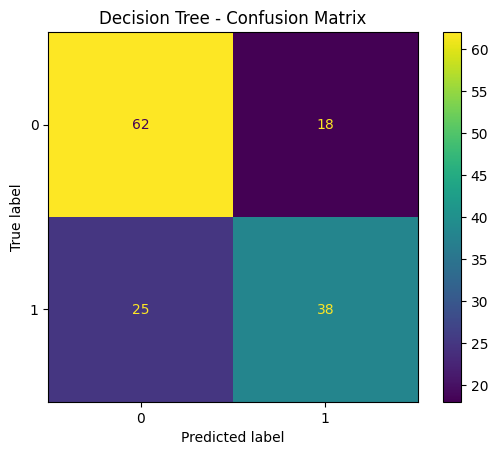

In [26]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.title("Decision Tree - Confusion Matrix")
plt.show()

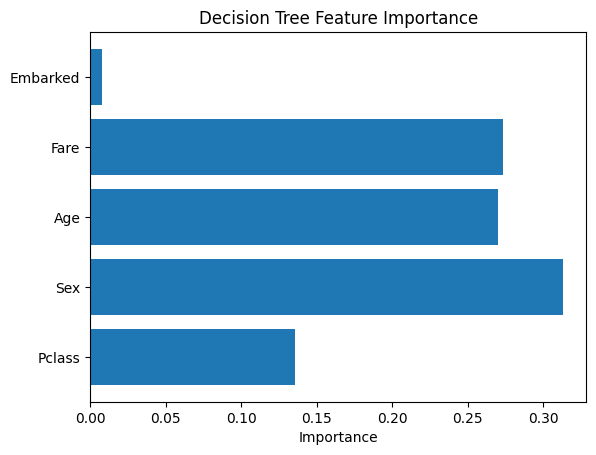


Feature Importance:
  Pclass: 0.1356
  Sex: 0.3130
  Age: 0.2703
  Fare: 0.2735
  Embarked: 0.0076


In [27]:
importances_dt = model_dt.feature_importances_
features_dt = X.columns

plt.barh(features_dt, importances_dt)
plt.xlabel("Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

print("\nFeature Importance:")
for feature, importance in zip(features_dt, importances_dt):
    print(f"  {feature}: {importance:.4f}")

In [28]:
test1 = [[3, 0, 22, 7.25, 0]]
result1 = model_dt.predict(test1)
print(f"3rd class male, age 22: {'SURVIVED' if result1[0] == 1 else 'DID NOT SURVIVE'}")

test2 = [[1, 1, 30, 50, 1]] 
result2 = model_dt.predict(test2)
print(f"1st class female, age 30: {'SURVIVED' if result2[0] == 1 else 'DID NOT SURVIVE'}")

3rd class male, age 22: DID NOT SURVIVE
1st class female, age 30: SURVIVED


C:\Users\New\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\New\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
